In [1]:
# Daten Testen

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv(r"..\data\merged_all_by_ID.csv")


# Spalten definieren
score_cols_raw = [
    'PlayingTimeMin',
    'PlayingTimeMn/MP',
    'TeamSuccessPPM',
    'TeamSuccess+/-90',
    'Per90MinG+A',
    'TotalCmp%',
    'SCATypesPassLive',
    'CarriesTotDist',
    'Touches',
    'Tkl+Int',
    'AerialDuelsWon',
    'PerformanceTklW',
    'PlayingTimeMP'
]

# Nur Spieler behalten, bei denen PlayingTimeMP nicht null ist
df = df[df['PlayingTimeMP'] > 0].copy()

# Neue Spalten berechnen
df['SCAPerMP'] = df['SCATypesPassLive'] / df['PlayingTimeMP']
df['CarriesDistPerMP'] = df['CarriesTotDist'] / df['PlayingTimeMP']
df['TouchesPerMP'] = df['Touches'] / df['PlayingTimeMP']
df['TklIntPerMP'] = df['Tkl+Int'] / df['PlayingTimeMP']
df['AerialsWonPerMP'] = df['AerialDuelsWon'] / df['PlayingTimeMP']
df['TklWPerMP'] = df['PerformanceTklW'] / df['PlayingTimeMP']

# Nur diese Spalten fürs Scoring
score_cols = [
    'PlayingTimeMin',
    'PlayingTimeMn/MP',
    'TeamSuccessPPM',
    'TeamSuccess+/-90',
    'Per90MinG+A',
    'TotalCmp%',
    'SCAPerMP',
    'CarriesDistPerMP',
    'TouchesPerMP',
    'TklIntPerMP',
    'AerialsWonPerMP',
    'TklWPerMP'
]

# Nullwerte wie fehlende Werte behandeln
df[score_cols] = df[score_cols].replace(0, pd.NA)

# Spieler mit mehr als 1 fehlendem Wert ausschließen
df['missing_count'] = df[score_cols].isna().sum(axis=1)
df_clean = df[df['missing_count'] <= 1].copy()
df_clean.drop(columns='missing_count', inplace=True)

# NaN durch Spaltenmittelwert ersetzen (damit MinMax funktioniert)
df_clean[score_cols] = df_clean[score_cols].fillna(df_clean[score_cols].mean())

# Normalisieren (0–1) & Score berechnen
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_clean[score_cols])
df_clean['OverallScore'] = scaled.sum(axis=1)

# Ranking sortieren
ranking = df_clean[['ID', 'Player', 'OverallScore'] + score_cols].sort_values(by='OverallScore', ascending=False)

# Optional: speichern
#ranking.to_csv("spieler_ranking.csv", index=False)

# Ausgabe anzeigen
print(ranking.head(5))  # Top 20


               ID           Player  OverallScore  PlayingTimeMin  \
435  NuDFpt212002      Nuno Mendes      7.181799           419.0   
555  ToMFde341990       Toni Kroos      7.083192           469.0   
461  PeDFpt401983             Pepe      7.038814           408.0   
248  JoDFde281995   Joshua Kimmich      6.952291           480.0   
62   AyDFes291994  Aymeric Laporte      6.889462           525.0   

     PlayingTimeMn/MP  TeamSuccessPPM  TeamSuccess+/-90  Per90MinG+A  \
435             105.0             2.0              0.64     0.495882   
555              94.0             2.0              1.34     0.495882   
461             102.0             2.0              0.88     0.495882   
248              96.0             2.0              1.31     0.370000   
62               88.0             3.0              1.37     0.495882   

     TotalCmp%  SCAPerMP  CarriesDistPerMP  TouchesPerMP  TklIntPerMP  \
435       88.2       1.5            333.00        107.25         4.25   
555       90

C:\Users\valen\AppData\Local\Temp\ipykernel_7576\2100008021.py:60: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean[score_cols] = df_clean[score_cols].fillna(df_clean[score_cols].mean())


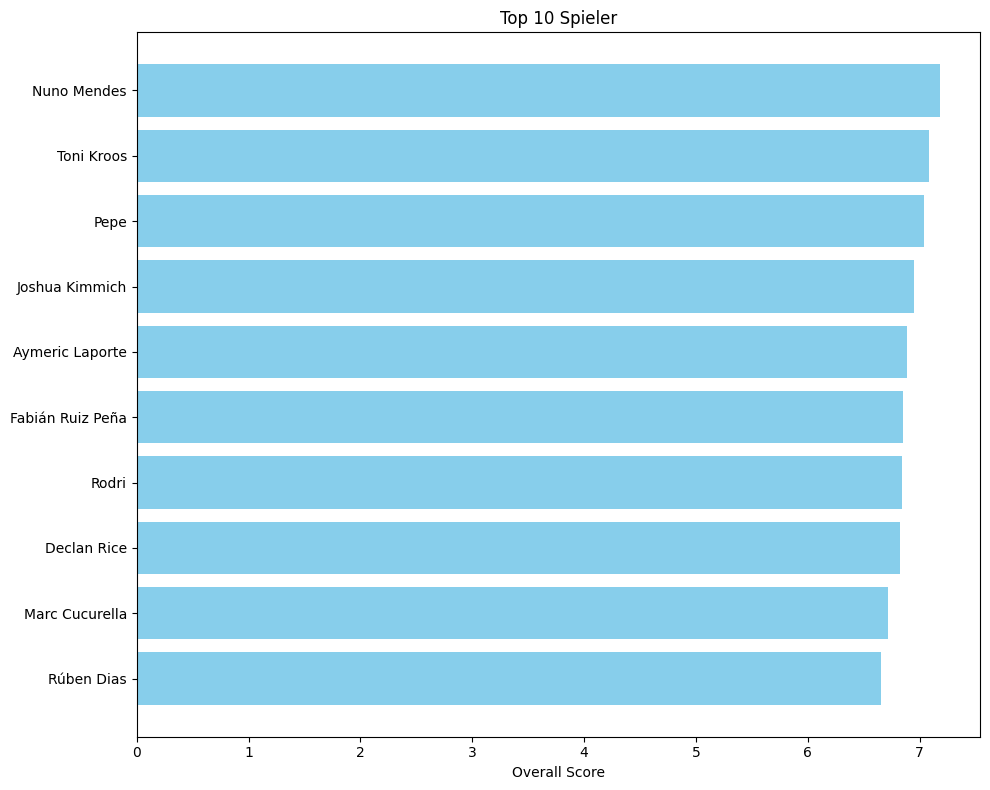

In [3]:
import matplotlib.pyplot as plt

#  Top 10 Spieler
top20 = ranking.head(10).sort_values(by='OverallScore')  # für horizontale Sortierung

plt.figure(figsize=(10, 8))
plt.barh(top20['Player'], top20['OverallScore'], color='skyblue')
plt.xlabel("Overall Score")
plt.title("Top 10 Spieler")
plt.tight_layout()
plt.show()
